In [6]:
from AgentBasedModel.exchange import (
    Asset,
    Stock,
    ExchangeAgent
)
from AgentBasedModel.traders import (
    Trader,
    Random,
    Fundamentalist,
    Chartist1D,
    Chartist2D,
    Universalist,
    MarketMaker1D,
    MarketMaker2D
)
from AgentBasedModel.simulator import (
    Simulator,
    SimulatorInfo
)


from AgentBasedModel import *
from AgentBasedModel.extra import *
import AgentBasedModel.settings as settings
from AgentBasedModel.visualization import (
    plot_price,
    plot_price_fundamental,
    plot_liquidity,
    plot_orderbook_imbalance,
    plot_trade_imbalance,
    plot_price,
    plot_spread,
    )
    
from random import randint


In [8]:
# Define parameters
risk_free_rate = 5e-4
price = 100
dividend = price * risk_free_rate

# Initialize objects

# Initialization of stocks
assets = [
    Stock(dividend) for _ in range(10)
]

# Exchange agent (intermediary between market and customer)
exchanges = [
    ExchangeAgent(assets[i], risk_free_rate) for i in range(10) #for x in range(10)   # single asset
]


# Market customers
traders = [
    *[Random(exchanges[randint(0, 2)])         for _ in range(20)],
    *[Fundamentalist(exchanges[randint(0, 2)]) for _ in range(20)],
    *[Chartist2D(exchanges)                    for _ in range(20)],
    *[MarketMaker2D(exchanges)                 for _ in range(4)]
]

# Run simulation
simulator = Simulator(**{
    'assets': assets,
    
    'exchanges': exchanges,
    'traders': traders,
    'events': [MarketPriceShock(0, 200, -10)]
})



Simulation: 100%|██████████| 500/500 [00:03<00:00, 136.80it/s]


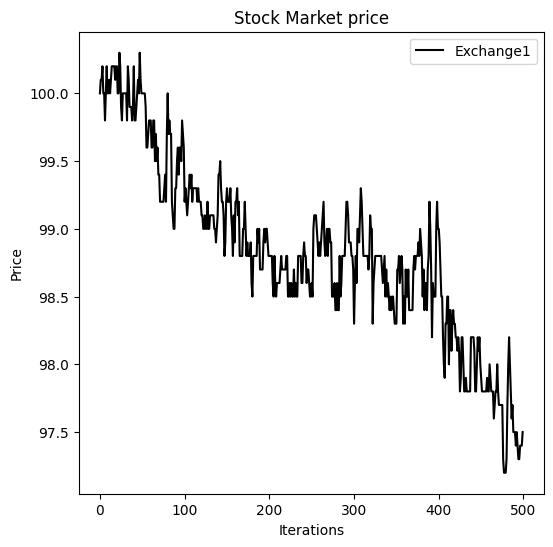

NameError: name 'plot_gain' is not defined

In [9]:
ExchangeAgent.id = 0 
Asset.id = 0
Trader.id = 0

info = simulator.info
simulator.simulate(500, silent=False)

#plot_price(info, None, rolling=1)


#plot_liquidity(info,None, rolling = 1)

#plot_trade_imbalance(info,idx=1, left_iter=1,right_iter=100)

#plot_price(info,idx = 1,left_iter = 1, right_iter = 10)

idx = 1

plot_price(info, idx = idx)

# plot_spread(info, idx, 1,5)

# plot_spread(info, idx, 1 ,20)

# plot_spread(info, idx, 1, 100)


plot_gain(info,idx, 1, 100)